In [2]:
import pickle

# Specify the path to the saved pickle file
file_path = 'processed/oversampled_balanced_binary_dataset.pkl'

# Load the dataset from the pickle file
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Retrieve features and labels from the loaded data
X_resampled = data['features']  # Features
y_resampled = data['labels']    # Labels

# Now you can use X_resampled and y_resampled in your machine learning pipeline
# For example, you can print the shape of the loaded data
print("Shape of features (X_resampled):", X_resampled.shape)
print("Shape of labels (y_resampled):", y_resampled.shape)


Shape of features (X_resampled): (4546194, 42)
Shape of labels (y_resampled): (4546194,)


Splitting dataset

In [3]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the training set and test set
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=41, stratify=y_resampled)

# Splitting the temp dataset into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Training set size: ", X_train.shape, y_train.shape)
print("Validation set size: ", X_val.shape, y_val.shape)
print("Test set size: ", X_test.shape, y_test.shape)


Training set size:  (3182335, 42) (3182335,)
Validation set size:  (681929, 42) (681929,)
Test set size:  (681930, 42) (681930,)


Model training

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define the model
model_binary = Sequential([
    Input(shape=(X_resampled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Using sigmoid for binary classification
])

# Compile the model
model_binary.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Set up the checkpoint to save the best model
checkpoint = ModelCheckpoint('models/best_binary_model_42features.keras', save_best_only=True, monitor='val_accuracy', mode='max')

# Train the model
history = model_binary.fit(X_resampled, y_resampled, epochs=20, batch_size=64, validation_split=0.2, callbacks=[checkpoint])


Epoch 1/20
56828/56828 ━━━━━━━━━━━━━━━━━━━━ 53s 917us/step - accuracy: 0.9624 - loss: 0.0965 - val_accuracy: 0.9966 - val_loss: 0.0597
Epoch 2/20
56828/56828 ━━━━━━━━━━━━━━━━━━━━ 52s 909us/step - accuracy: 0.9742 - loss: 0.0654 - val_accuracy: 0.9583 - val_loss: 0.0769
Epoch 3/20
56828/56828 ━━━━━━━━━━━━━━━━━━━━ 49s 856us/step - accuracy: 0.9758 - loss: 0.0609 - val_accuracy: 0.9946 - val_loss: 0.0462
Epoch 4/20
56828/56828 ━━━━━━━━━━━━━━━━━━━━ 53s 923us/step - accuracy: 0.9768 - loss: 0.0569 - val_accuracy: 0.9876 - val_loss: 0.0527
Epoch 5/20
56828/56828 ━━━━━━━━━━━━━━━━━━━━ 53s 934us/step - accuracy: 0.9774 - loss: 0.0554 - val_accuracy: 0.9974 - val_loss: 0.0454
Epoch 6/20
56828/56828 ━━━━━━━━━━━━━━━━━━━━ 55s 959us/step - accuracy: 0.9779 - loss: 0.0570 - val_accuracy: 0.9954 - val_loss: 0.0468
Epoch 7/20
56828/56828 ━━━━━━━━━━━━━━━━━━━━ 52s 910us/step - accuracy: 0.9787 - loss: 0.0658 - val_accuracy: 0.9902 - val_loss: 0.0437
Epoch 8/20
56828/56828 ━━━━━━━━━━━━━━━━━━━━ 52s 918us/s

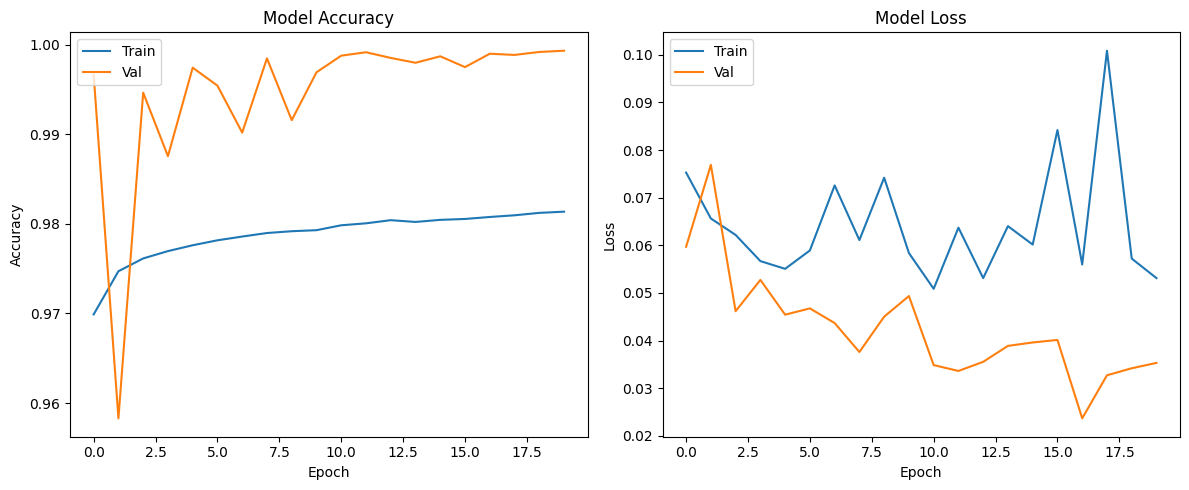

In [7]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()
#plt.savefig('binary_classifier_learning.png')


Testing

In [8]:
from tensorflow.keras.models import load_model

# Load the saved best model
model_binary = load_model('models/best_binary_model_42features.keras')

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_binary.evaluate(X_test, y_test)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

21311/21311 ━━━━━━━━━━━━━━━━━━━━ 10s 484us/step - accuracy: 0.9859 - loss: 0.0379
Test Loss: 0.03833211585879326
Test Accuracy: 0.9857609868049622


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
predictions = model_binary.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Threshold predictions to get binary output

# Generate a classification report
report = classification_report(y_test, predictions, target_names=['Non-Attack', 'Attack'])
print(report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)


21311/21311 ━━━━━━━━━━━━━━━━━━━━ 11s 500us/step
              precision    recall  f1-score   support

  Non-Attack       1.00      0.97      0.99    340965
      Attack       0.97      1.00      0.99    340965

    accuracy                           0.99    681930
   macro avg       0.99      0.99      0.99    681930
weighted avg       0.99      0.99      0.99    681930

[[331493   9472]
 [   238 340727]]


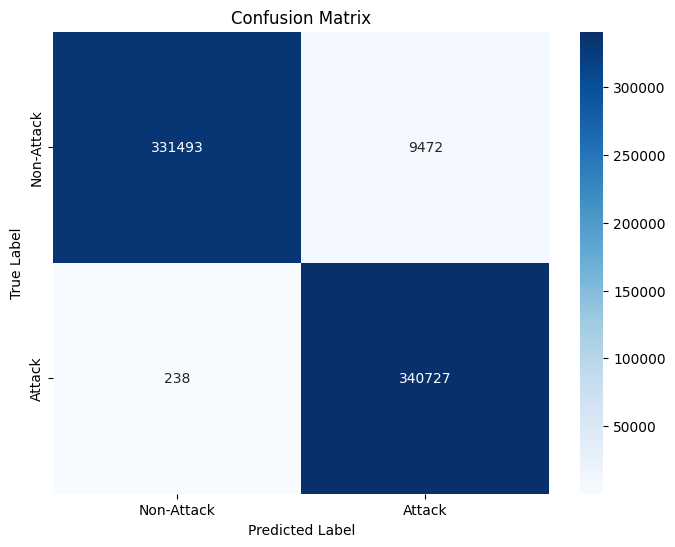

In [12]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Attack', 'Attack'], yticklabels=['Non-Attack', 'Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
